In [1]:
import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as pp

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
np.random.seed(13)

In [3]:
X_train, X_test, y_train, y_test = pp.preprocess_game_stats(y_goal_diff=True, suffix='no_measures')

In [4]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8995, 13)
(2249, 13)
(8995,)
(2249,)


In [5]:
model_linear = LinearRegression().fit(X_train, y_train)

In [6]:
y_pred_linear = model_linear.predict(X_test)

In [7]:
print("Mean squared error for linear model:", mean_squared_error(y_test, y_pred_linear))
print("Mean absolute error for linear model:", mean_absolute_error(y_test, y_pred_linear))

Mean squared error for linear model: 4.923581799775852
Mean absolute error for linear model: 1.7764187557237223


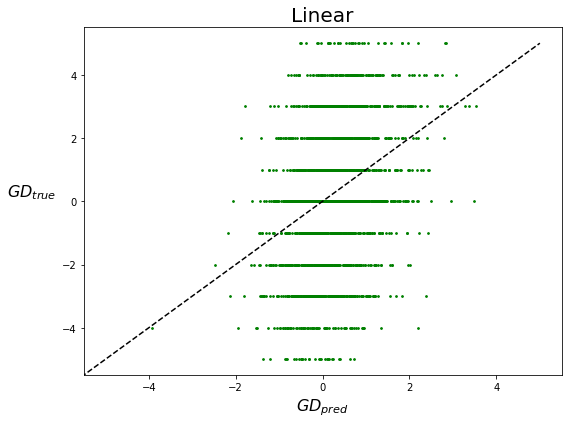

In [8]:
plt.subplots(figsize=(8, 6))

points = np.arange(-6, 6)

plt.scatter(y_pred_linear, y_test, c='green', s=3)
plt.plot(points, points, linestyle='dashed', color='black')

plt.xlabel('$GD_{pred}$', fontsize=16)
plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
plt.title('Linear', fontsize=20)

plt.xlim((-5.5, 5.5))
plt.ylim((-5.5, 5.5))

plt.tight_layout()
# plt.savefig("img/GDtrue_vs_GDpred_mlp.png")

plt.show()

In [17]:
y_pred_baseline = np.full_like(y_test, np.mean(y_train), dtype=np.float64)

In [18]:
print("Baseline mean squared error:", mean_squared_error(y_test, y_pred_baseline))
print("Baseline mean absolute error:", mean_absolute_error(y_test, y_pred_baseline))

Baseline mean squared error: 5.519093267066119
Baseline mean absolute error: 1.867503832844244


In [19]:
x = np.arange(3)
y = np.arange(10)

np.where(y in x, x, y)

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


ValueError: operands could not be broadcast together with shapes () (3,) (10,) 

In [22]:
import os
print(os.path.exists('data/index'))

False


In [24]:
idx = pd.Index(range(20))
values = np.arange(10)

print(idx.isin(values))

[ True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False]


In [26]:
y_goal_diff = False
suffix_y = '_goal_diff' if y_goal_diff else '_result'
print(suffix_y)

_result
